<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Preliminar de Dados de Insuficiência Cardíaca - Valk Castellani

## Contexto

Este notebook explora um conjunto de dados de insuficiência cardíaca obtido do Kaggle, voltado para a predição de doenças cardíacas. As doenças cardiovasculares (DCVs) são a principal causa de morte no mundo, resultando em aproximadamente 17,9 milhões de óbitos anuais, o que corresponde a 31% de todas as mortes globalmente. Quatro em cada cinco dessas mortes são provocadas por ataques cardíacos e acidentes vasculares cerebrais, sendo que um terço ocorre prematuramente em pessoas com menos de 70 anos.

A insuficiência cardíaca é uma ocorrência comum entre pessoas com doenças cardiovasculares. Este dataset contém 11 variáveis que podem ser utilizadas para prever a presença de uma possível doença cardíaca. Ele é composto por dados relevantes, como hipertensão, diabetes, hiperlipidemia, entre outros fatores de risco. Modelos de machine learning podem desempenhar um papel fundamental na detecção precoce e no manejo de pacientes de alto risco, auxiliando no tratamento adequado e na redução de mortes prematuras.

## Configuração do ambiente

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

O dataset contém informações sobre vários pacientes, com cada registro representando uma pessoa. As variáveis incluem características médicas, medidas de saúde e a presença ou ausência de doença cardíaca. A última coluna, HeartDisease, indica se a paciente tem doença cardíaca (1) ou não (0).

### Informações dos Atributos
* Age: idade do paciente [anos]
* Sex: sexo do paciente [M: Masculino, F: Feminino]
* ChestPainType: tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomático]
* RestingBP: pressão arterial em repouso [mm Hg]
* Cholesterol: colesterol sérico [mm/dl]
* FastingBS: glicemia de jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]
* RestingECG: resultados do eletrocardiograma de repouso [Normal: Normal, ST: anomalia da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0.05 mV), LVH: mostrando possível ou definida hipertrofia ventricular esquerda pelos critérios de Estes]
* MaxHR: frequência cardíaca máxima atingida [Valor numérico entre 60 e 202]
* ExerciseAngina: angina induzida por exercício [Y: Sim, N: Não]
* Oldpeak: valor de depressão do segmento ST [Valor numérico medido em depressão]
* ST_Slope: inclinação do segmento ST durante o pico de exercício [Up: inclinação ascendente, Flat: plana, Down: inclinação descendente]
* HeartDisease: classe de saída [1: doença cardíaca, 0: Normal]


O objetivo é prever se um paciente tem doença cardíaca ou não baseado em suas características.

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/valkcastellani/heart_failure_api/master/MachineLearning/data/heart_dataset.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
5,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
6,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
7,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
8,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
9,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             916 non-null    int64  
 1   Sex             916 non-null    object 
 2   ChestPainType   916 non-null    object 
 3   RestingBP       916 non-null    int64  
 4   Cholesterol     916 non-null    int64  
 5   FastingBS       916 non-null    int64  
 6   RestingECG      916 non-null    object 
 7   MaxHR           916 non-null    int64  
 8   ExerciseAngina  916 non-null    object 
 9   Oldpeak         916 non-null    float64
 10  ST_Slope        916 non-null    object 
 11  HeartDisease    916 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.0+ KB


### Transformação de dados

Como existem algumas colunas com dados não númericos, faz se necessário padroniza-los em dados númericos para facilitar o treinamento do modelo.


*   Sexo passou de M (Masculino) para 0, e de F (Feminino) para 1;
*   Tipo de dor no peiro passou de TA (Angina Típica) para 0, de ATA (Angina Atípica) para 1, de NAP (Dor Não Anginosa) para 2, e de ASY (Assintomático) para 3;
*   Resultados do eletrocardiograma de repouso passou de Normal (Normal) para 0, de ST (anomalia da onda ST-T), e de LVH (mostrando possível ou definida hipertrofia ventricular esquerda pelos critérios de Estes) para 2;
*   Angina induzida por exercício passou de Y (Sim) para 0, e de N (Não) para 1;
*   Inclinação do segmento ST durante o pico de exercício passou de Up (inclinação ascendente) para 0, de Flat (plana) para 1, e de Down (inclinação descendente) para 2.








In [4]:
# Ajustando valores não númericos
sexo = {"M": 0, "F": 1}
dataset['Sex'] = dataset['Sex'].map(sexo)
dataset['Sex'] = dataset['Sex'].astype(int)
dor = {"TA": 0, "ATA": 1, "NAP": 2, "ASY": 3}
dataset['ChestPainType'] = dataset['ChestPainType'].map(dor)
dataset['ChestPainType'] = dataset['ChestPainType'].astype(int)
ecg = {"Normal": 0, "ST": 1, "LVH": 2}
dataset['RestingECG'] = dataset['RestingECG'].map(ecg)
dataset['RestingECG'] = dataset['RestingECG'].astype(int)
exercicio = {"Y": 0, "N": 1}
dataset['ExerciseAngina'] = dataset['ExerciseAngina'].map(exercicio)
dataset['ExerciseAngina'] = dataset['ExerciseAngina'].astype(int)
inclinacao = {"Up": 0, "Flat": 1, "Down": 2}
dataset['ST_Slope'] = dataset['ST_Slope'].map(inclinacao)
dataset['ST_Slope'] = dataset['ST_Slope'].astype(int)
dataset.head(10)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,49,1,2,160,180,0,0,156,1,1.0,1,1
1,37,0,1,130,283,0,1,98,1,0.0,0,0
2,48,1,3,138,214,0,0,108,0,1.5,1,1
3,54,0,2,150,195,0,0,122,1,0.0,0,0
4,39,0,2,120,339,0,0,170,1,0.0,0,0
5,45,1,1,130,237,0,0,170,1,0.0,0,0
6,54,0,1,110,208,0,0,142,1,0.0,0,0
7,37,0,3,140,207,0,0,130,0,1.5,1,1
8,48,1,1,120,284,0,0,120,1,0.0,0,0
9,37,1,2,130,211,0,0,142,1,0.0,0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             916 non-null    int64  
 1   Sex             916 non-null    int64  
 2   ChestPainType   916 non-null    int64  
 3   RestingBP       916 non-null    int64  
 4   Cholesterol     916 non-null    int64  
 5   FastingBS       916 non-null    int64  
 6   RestingECG      916 non-null    int64  
 7   MaxHR           916 non-null    int64  
 8   ExerciseAngina  916 non-null    int64  
 9   Oldpeak         916 non-null    float64
 10  ST_Slope        916 non-null    int64  
 11  HeartDisease    916 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.0 KB


## Separação em conjunto de treino e conjunto de teste com holdout

In [6]:
test_size = 0.20  # tamanho do conjunto de teste
seed = 7  # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:, 0:11]
y = array[:, 11]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y
)  # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = "accuracy"
num_particoes = 10
kfold = StratifiedKFold(
    n_splits=num_particoes, shuffle=True, random_state=seed
)  # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.856553 (0.044219)
KNN: 0.695428 (0.046054)
CART: 0.810181 (0.034412)
NB: 0.849667 (0.050292)
SVM: 0.721251 (0.042859)
Bagging: 0.853795 (0.042065)
RF: 0.866142 (0.042247)
ET: 0.859330 (0.042282)
Ada: 0.849704 (0.028833)
GB: 0.859311 (0.052919)
Voting: 0.849741 (0.038650)


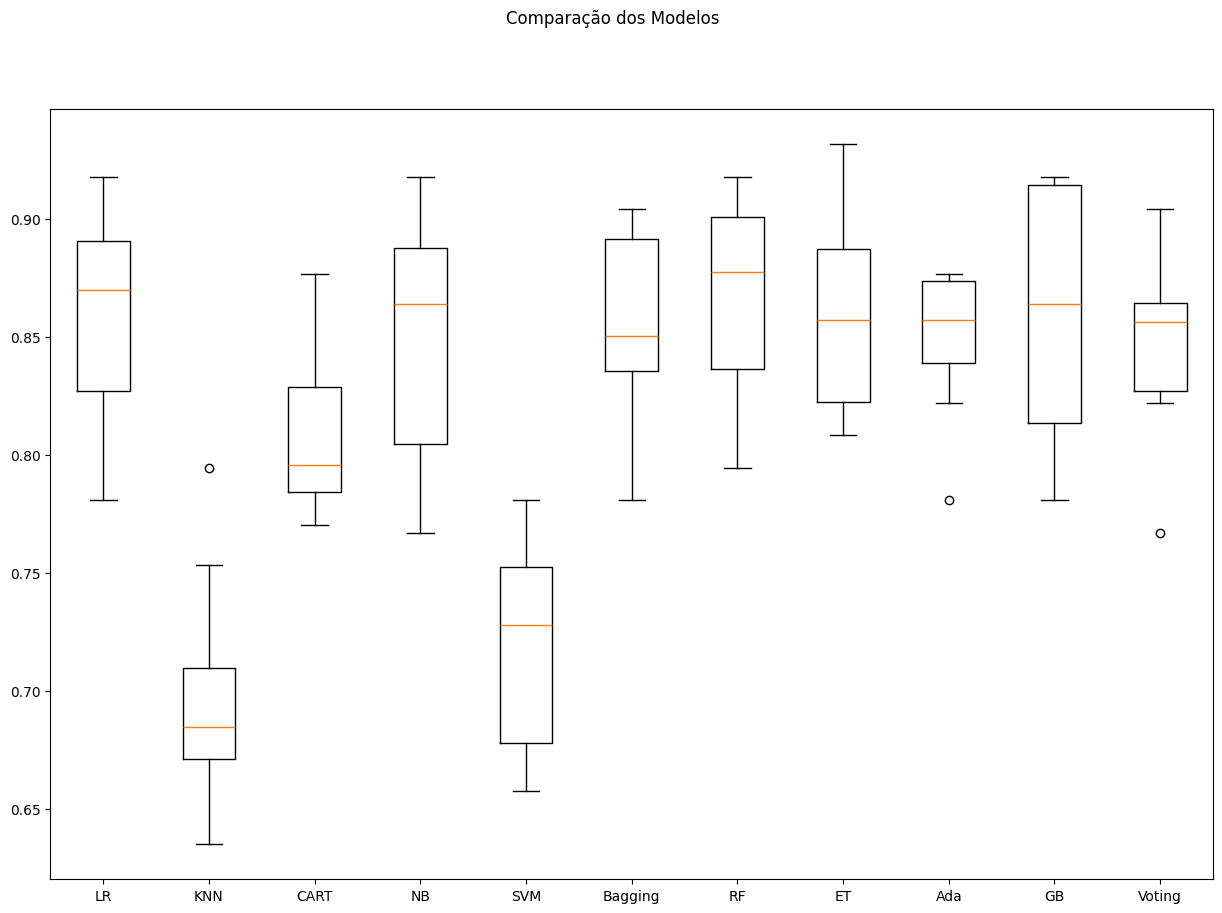

In [7]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Trabalhando com dados pontencialmente desbalanceados ou sensíveis a escala

StandardScaler (padronização do conjunto de dados) e MinMaxScaler (normalização do conjunto de dados) são duas técnicas de normalização/escala usadas em machine learning para pré-processamento de dados e são úteis para preparar dados para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.

##### StandardScaler
StandardScaler padroniza os dados, ou seja, remove a média e escala os dados para que tenham uma variância unitária. Ele transforma os dados para que a média de cada feature seja 0 e a variância seja 1.

Fórmula: $z_i=\frac{x_i-\mu}{\sigma}$


onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $\mu$ é a média dos valores da feature.
- $\sigma$ é o desvio padrão dos valores da feature.
𝑥
x é o valor original da feature.
𝜇
μ é a média dos valores da feature.
𝜎
σ é o desvio padrão dos valores da feature.


##### MinMaxScaler
MinMaxScaler escala e transforma os dados para um intervalo específico, geralmente entre 0 e 1. Ele transforma os dados para que o menor valor de uma feature seja 0 e o maior valor seja 1.

Fórmula: $z_i=\frac{x_i-min(x)}{max(x)-min(x)}$

onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $min(x)$ é o menor valor da feature.
- $max(x)$ é o maior valor da feature.

Nós vamos aplicar essas técnicas para os dados do dataset heart failures através da construção de pipelines. Pipelines são uma maneira de simplificar o processo de construção de modelos, permitindo que você execute várias etapas de pré-processamento e modelagem em sequência.

LR-orig: 0.857 (0.044)
KNN-orig: 0.695 (0.046)
CART-orig: 0.810 (0.034)
NB-orig: 0.850 (0.050)
SVM-orig: 0.721 (0.043)
Bag-orig: 0.854 (0.042)
RF-orig: 0.866 (0.042)
ET-orig: 0.859 (0.042)
Ada-orig: 0.850 (0.029)
GB-orig: 0.859 (0.053)
Vot-orig: 0.850 (0.039)
LR-padr: 0.854 (0.044)
KNN-padr: 0.872 (0.037)
CART-padr: 0.802 (0.041)
NB-padr: 0.850 (0.050)
SVM-padr: 0.874 (0.039)
Bag-padr: 0.850 (0.036)
RF-padr: 0.870 (0.046)
ET-padr: 0.866 (0.039)
Ada-padr: 0.850 (0.029)
GB-padr: 0.861 (0.052)
Vot-padr: 0.872 (0.043)
LR-norm: 0.858 (0.039)
KNN-norm: 0.844 (0.056)
CART-norm: 0.801 (0.035)
NB-norm: 0.850 (0.050)
SVM-norm: 0.870 (0.036)
Bag-norm: 0.844 (0.037)
RF-norm: 0.863 (0.037)
ET-norm: 0.865 (0.035)
Ada-norm: 0.851 (0.030)
GB-norm: 0.858 (0.052)
Vot-norm: 0.865 (0.035)


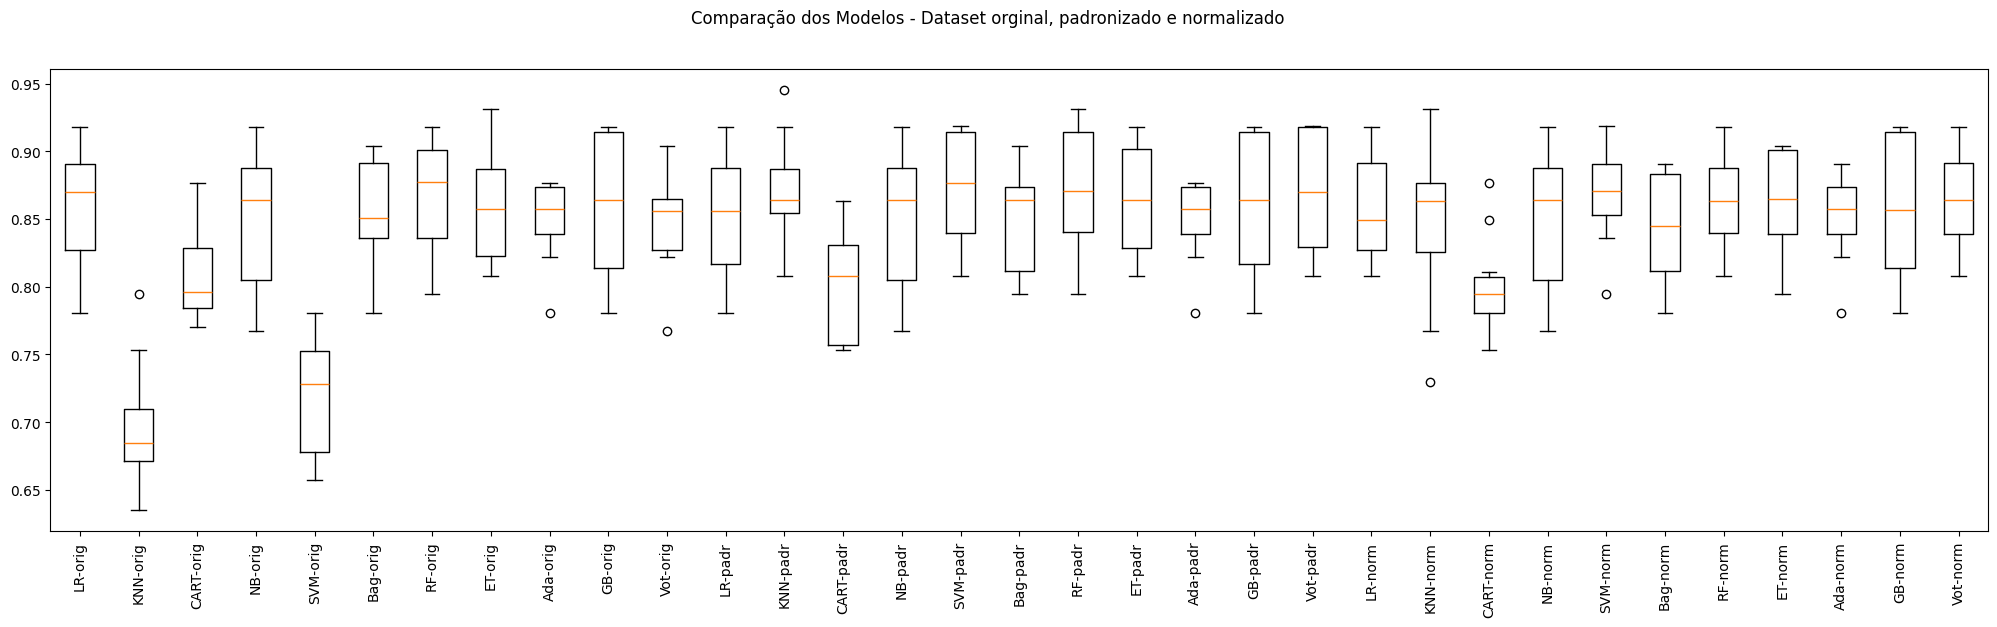

In [8]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

A otimização de hiperparâmetros é o processo de encontrar os valores ideais para os hiperparâmetros de um modelo de machine learning. O objetivo é encontrar a combinação de hiperparâmetros que resulta no melhor desempenho do modelo.


##### Grid Search (*força bruta*)

Como Funciona o Grid Search?
1. Definição do Espaço de Hiperparâmetros: Primeiro, define-se um conjunto de valores possíveis para cada hiperparâmetro.
2. Avaliação das Combinações: Em seguida, cada combinação possível desses valores é avaliada.
3. Seleção do Melhor Conjunto: A combinação de hiperparâmetros que produz o melhor desempenho é selecionada.

In [9]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

# Aproximadamente 44 min de processamento (Intel(R) Core(TM) i7-1165G7 11th @ 2.80GHz com 32GB de memória)
# Aproximadamente 1 hora de processamento no Google Colab


Modelo: LR-orig - Melhor: 0.856556 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.856556 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
Modelo: LR-norm - Melhor: 0.856565 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
Modelo: KNN-orig - Melhor: 0.745942 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}
Modelo: KNN-padr - Melhor: 0.879760 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
Modelo: KNN-norm - Melhor: 0.866061 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
Modelo: CART-orig - Melhor: 0.821033 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
Modelo: CART-padr - Melhor: 0.820995 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.822393 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 5}
Modelo: NB-orig - Melhor: 0.849725 usando {'NB__var_smoothing': 1e-06}
Modelo: NB

### Resultado da execução

*   Modelo: LR-orig - Melhor: 0.856556 usando {'LR__C': 10, 'LR__solver':
'liblinear'}
*   Modelo: LR-padr - Melhor: 0.856556 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
*   Modelo: LR-norm - Melhor: 0.856565 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
*   Modelo: KNN-orig - Melhor: 0.745942 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}
*   Modelo: KNN-padr - Melhor: 0.879760 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
*   Modelo: KNN-norm - Melhor: 0.866061 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
*   Modelo: CART-orig - Melhor: 0.821033 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
*   Modelo: CART-padr - Melhor: 0.820995 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
*   Modelo: CART-norm - Melhor: 0.822393 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 5}
*   Modelo: NB-orig - Melhor: 0.849725 usando {'NB__var_smoothing': 1e-06}
*   Modelo: NB-padr - Melhor: 0.845616 usando {'NB__var_smoothing': 1e-09}
*   Modelo: NB-norm - Melhor: 0.845616 usando {'NB__var_smoothing': 1e-09}
*   Modelo: SVM-orig - Melhor: 0.862045 usando {'SVM__C': 1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
*   Modelo: SVM-padr - Melhor: 0.871587 usando {'SVM__C': 1, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
*   Modelo: SVM-norm - Melhor: 0.871587 usando {'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
*   Modelo: Bagging-orig - Melhor: 0.852409 usando {}
*   Modelo: Bagging-padr - Melhor: 0.852428 usando {}
*   Modelo: Bagging-norm - Melhor: 0.857907 usando {}
*   Modelo: RF-orig - Melhor: 0.879713 usando {'RF__max_depth': 20, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 10, 'RF__n_estimators': 50}
*   Modelo: RF-padr - Melhor: 0.878399 usando {'RF__max_depth': None, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 10, 'RF__n_estimators': 50}
*   Modelo: RF-norm - Melhor: 0.879750 usando {'RF__max_depth': 20, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}
*   Modelo: ET-orig - Melhor: 0.882490 usando {'ET__max_depth': 10, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 10, 'ET__n_estimators': 10}
*   Modelo: ET-padr - Melhor: 0.883869 usando {'ET__max_depth': None, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 4, 'ET__min_samples_split': 5, 'ET__n_estimators': 100}
*   Modelo: ET-norm - Melhor: 0.882509 usando {'ET__max_depth': None, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 4, 'ET__min_samples_split': 10, 'ET__n_estimators': 10}
*   Modelo: Ada-orig - Melhor: 0.868838 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 100}
*   Modelo: Ada-padr - Melhor: 0.868838 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 100}
*   Modelo: Ada-norm - Melhor: 0.868838 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 100}
*   Modelo: GB-orig - Melhor: 0.872910 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 7, 'GB__n_estimators': 50}
*   Modelo: GB-padr - Melhor: 0.874243 usando {'GB__learning_rate': 0.1, 'GB_
_max_depth': 7, 'GB__n_estimators': 200}
*   Modelo: GB-norm - Melhor: 0.872920 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 7, 'GB__n_estimators': 50}
*   Modelo: Voting-orig - Melhor: 0.851095 usando {}
*   Modelo: Voting-padr - Melhor: 0.874317 usando {}
*   Modelo: Voting-norm - Melhor: 0.864738 usando {}

O melhor modelo encontrado foi: **Modelo:** ET-padr - **Melhor:** 0.883869 usando {'ET__max_depth': None, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 4, 'ET__min_samples_split': 5, 'ET__n_estimators': 100}

# Tuning do ExtraTreesClassifier (Otimização dos Hyperparâmetros)

Tentei inicialmente fazer a configuração abaixo:

* **n_estimators** (padrão=100) - O número de árvores na floresta. Optei por variar de 10 a 200, de 10 em 10.
* **max_depth** (padrão=None) - A profundidade máxima da árvore. Optei por utilizar o None, e variar de 5 a 100, de 5 em 5.
* **min_samples_split** (padrão=2) - O número mínimo de amostras necessárias para dividir um nó interno. Optei por variar de 2 a 20, de 1 em 1.
* **min_samples_leaf** (padrão=1) - O número mínimo de amostras necessárias para estar em um nó folha. Optei por variar de 1 a 20, de 1 em 1.
* **max_features** (padrão=sqrt) - O número de recursos a serem considerados ao procurar a melhor divisão. Optei por considerar: auto, sqrt, log2 e None.

No entanto, o processo de tuning ficou em execução por mais de 4 horas e não finalizou, tornando inviável enviá-lo dessa forma para correção. Por isso, optei por fazer apenas pequenas alterações em relação ao que já havia sido utilizado anteriormente, com o objetivo de complementar meu aprendizado.

* **n_estimators** (padrão=100) - O número de árvores na floresta. Optei por [10, 20, 50, 100, 200].
* **max_depth** (padrão=None) - A profundidade máxima da árvore. Optei por [None, 10, 20, 30, 40].
* **min_samples_split** (padrão=2) - O número mínimo de amostras necessárias para dividir um nó interno. Optei por [2, 5, 8, 10, 13].
* **min_samples_leaf** (padrão=1) - O número mínimo de amostras necessárias para estar em um nó folha. Optei por [1, 2, 4, 5, 8].
* **max_features** (padrão=sqrt) - O número de recursos a serem considerados ao procurar a melhor divisão. Optei por ['auto', 'sqrt', 'log2', None], apesar de ter lido na documentação que o *auto* foi subistituído pelo *sqrt*.


In [19]:
# Tuning do ExtraTreesClassifier

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
et = ('ET', ExtraTreesClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('ET-orig', Pipeline(steps=[et])))
pipelines.append(('ET-padr', Pipeline(steps=[standard_scaler, et])))
pipelines.append(('ET-norm', Pipeline(steps=[min_max_scaler, et])))

# param_grid = {
#         'ET__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
#         'ET__max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
#         'ET__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
#         'ET__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
#         'ET__max_features': ['auto', 'sqrt', 'log2', None]
# }  // mais de 4 horas e não terminou o treinamento
param_grid = {
        'ET__n_estimators': [10, 20, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2', None],
        'ET__max_depth': [None, 10, 20, 30, 40],
        'ET__min_samples_split': [2, 5, 8, 10, 13],
        'ET__min_samples_leaf': [1, 2, 4, 5, 8]
}
        
# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))
    
    # Aproximadamente 30 min de processamento (Intel(R) Core(TM) i7-1165G7 11th @ 2.80GHz com 32GB de memória)

Sem tratamento de missings: ET-orig - Melhor: 0.882481 usando {'ET__max_depth': 20, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 4, 'ET__min_samples_split': 2, 'ET__n_estimators': 50}
Sem tratamento de missings: ET-padr - Melhor: 0.883841 usando {'ET__max_depth': 20, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 2, 'ET__n_estimators': 50}
Sem tratamento de missings: ET-norm - Melhor: 0.885211 usando {'ET__max_depth': None, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 10, 'ET__n_estimators': 20}


## Finalização do Modelo

O melhor modelo encontrado foi: **Modelo:** ET-norm - **Melhor:** 0.885211 usando {'ET__max_depth': None, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 10, 'ET__n_estimators': 20}

In [20]:
# Avaliação do modelo com o conjunto de testes

np.random.seed(7)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = ExtraTreesClassifier(n_estimators=20,
                               max_features='log2',
                               min_samples_split=10,
                               max_depth=None,
                               min_samples_leaf=2)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8586956521739131


Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [26]:
np.random.seed(7)

model = ExtraTreesClassifier(n_estimators=20,
                               max_features='log2',
                               min_samples_split=10,
                               max_depth=None,
                               min_samples_leaf=2)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('ET', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8586956521739131


## Salvando os arquivos

In [30]:
# Salvando o modelo
model_filename = 'et_heart_failures_classifier.pkl'
with open("../models/"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'minmax_scaler_heart_failures.pkl'
with open("../scalers/"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
pipeline_filename = 'et_heart_failures_pipeline.pkl'
with open("../pipelines/"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/X_test_dataset_heart_failures.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_heart_failures.csv", index=False)


## Simulando a aplicação do modelo em dados não vistos

In [27]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

ExtraTreesClassifier(max_features='log2', min_samples_leaf=2,
                     min_samples_split=10, n_estimators=20)

In [31]:
# Novos dados - não sabemos a classe!
data = {
    "Age": [40, 40, 42],
    "Sex": [0, 0, 0],
    "ChestPainType": [1, 3, 3],
    "RestingBP": [140, 150, 105],
    "Cholesterol": [289, 392, 0],
    "FastingBS": [0, 0, 1],
    "RestingECG": [0, 0, 0],
    "MaxHR": [172, 130, 128],
    "ExerciseAngina": [1, 1, 0],
    "Oldpeak": [0, 2, -1.5],
    "ST_Slope": [0, 1, 2],
}
# Resultado correto [0, 1, 1]

atributos = [
    "Age",
    "Sex",
    "ChestPainType",
    "RestingBP",
    "Cholesterol",
    "FastingBS",
    "RestingECG",
    "MaxHR",
    "ExerciseAngina",
    "Oldpeak",
    "ST_Slope",
]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:, 0:11].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[0.24489796 0.         0.33333333 0.7        0.47927032 0.
  0.         0.78873239 1.         0.29545455 0.        ]
 [0.24489796 0.         1.         0.75       0.65008292 0.
  0.         0.49295775 1.         0.52272727 0.5       ]
 [0.28571429 0.         1.         0.525      0.         1.
  0.         0.47887324 0.         0.125      1.        ]]


In [32]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 1.]
